## Kingsley Hunt SWBIO Data Science Individual Project
# An analysis of draft positioning and career success for NFL players based on pre-draft athletic testing

## Background to the NFL Draft
The National Football League (NFL) is the professional American football league in the NFL. It is made of 32 teams who compete annually for the Super Bowl. Each year, in April, the teams take turns to sign the best players from college football via the NFL Draft. Each team takes it in turns to pick a new player, with the order being determined by each team's record in the previous season. Teams pick in reverse order such that the latest Super Bowl winner will pick last, and the team with the worst record will pick first. Once every team has picked a player (or traded their pick to another team) then one round of the draft is complete and the worst team picks again. The draft is complete after seven rounds. After the NFL Draft is complete, teams are able to sign any remaining players they are interested in as undrafted free agents.

## NFL Scouting Combine
Each year, the best player's from college football are invited to the NFL's Scouting Combine. Here, they compete in a series of standardised athletic tests. Traditionally, these tests are thought to be informative for NFL teams in judging how well a college football player will perform in the NFL, and therefore whether they would make a good draft pick or not. Different positions in American football require different combinations of traits such as strength and speed, and so often certain tests are emphasised as important for different positions. As an example, wide receivers, who catch passes downfield, are thought to require speed and agility. In comparison, defensive linemen, who try and tackle the opposing quarterback, are usually bigger and stronger. The list of athletic tests in the combine are provided below:

**40-Yard Dash** - Player is timed to complete a sprint of 40 yards (36.576 metres) to assess speed.

**Vertical Jump** - From a standing position, a player crouches down and jumps as high as he can, used to assess explosiveness.

**Bench Rep** - Number of reps completed of a 225lb bench press, used to assess strength and stamina.

**Broad Jump** - From a standing stance, the player explodes forward as far as he can and must land without moving. Used to measure explosiveness.

**3-Cone Drill** - Player is timed to run between 3 cones, changing direction each time, which is used to assess agility.

**20-Yard Shuttle** - Player is timed to run 5-yards, 10-yards, and 5-yards, changing direction each team, used to assess speed and agility.

## Research Objectives
**Motivating Question - Are teams drafting efficiently?**

*NOTE:  Due to time availability and to streamline this project, this analysis will focus exclusively on quarterbacks - i.e. the players whose main responsibilitiy is to throw the ball. This is because Quarterbacks (or QBs) are wideley considered the most important position in football, often commanding the highest salaries on their team, functioning as team captains, and being a defining feature of successful football franchises. An extension to the work presented here would be to continue the analysis for all other positions on an NFL team.* 

1) From the features available pre-draft - e.g. results from Scouting Combine - which are most informative in predicting the draft round in which a player is taken. 

2) From the features available pre-draft - e.g. results from NFL Scouting Combine - which are most informative in predicting the success that a player will have in their NFL career? Do these features vary depending upon the American football position played? Career success can be measured in many different ways...

**All-Pro Selections** - the consensus best player in the league for each position, awarded once per year

**Pro-Bowl Selections** - players selected to play in the end of season Pro-Bowl Game, effectively the top 6 players for each position, awarded once per year.

**First-team Selection** - player is considered a first team starter for their NFL franchise, effectively one of the top 32 players for each position, awarded once per year.

We would expect, given the resources available to the scouting departments of teams in the NFL, that they have refined the scouting process such that they have good knowledge of which pre-draft features are most predictive of later on-field success. Therefore, we would expect the feature predictions for draft position and career success to be similar, as better players should be chosen at the start of the draft. If, instead there are differences in the features that predict career success and draft position, it suggests that the drafting process is inefficient. Identifying these market inefficiencies, if they exists, will allow teams in the NFL to draft talent more effectively than their rivals, and so provide a competitive advantage.

To begin, import the necessary modules to run the required code in the rest of this notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import GridSearchCV
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
import matplotlib.pyplot as plt

Warnings are imported to ensure warnings are not shown. This is because they do not impact the correct running of the code. For example, warnings are repeated 60 times when repeating the code to look for optimal hyperparameters. Toggle this on and off at your own discression, and make sure to enable when testing new code.

In [2]:
import warnings
warnings.filterwarnings("ignore")

Set the file path for the NFL_pre_draft.csv file. **NOTE - This needs to be changed to be specific to the local destination on your own PC**

In [3]:
pre_draft_filepath = r"C:\Users\klh238\OneDrive - University of Exeter\PhD\SWBio\Taught Modules\Python\NFL_pre_draft.csv"

Check the file has imported correctly by viewing the headings from the CSV file.

In [4]:
pre_draft = pd.read_csv(pre_draft_filepath)
pre_draft.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,Carolina Panthers,1.0,23.0


Set the file path for the NFL_post_draft.csv file. **NOTE - This needs to be changed to be specific to the local destination on your own PC**

In [5]:
post_draft_filepath = r"C:\Users\klh238\OneDrive - University of Exeter\PhD\SWBio\Taught Modules\Python\NFL_post_draft.csv"

Check the file has imported correctly by viewing the headings from the CSV file. NOTE - There may be lots of NaN, this is expected as not all career stats are recorded for all positions.

In [6]:
post_draft = pd.read_csv(post_draft_filepath)
post_draft.head()

,Pfr_ID,HOF,Age,All_Pro,Pro_Bowl,First_Team,G,Cmp,Pass_Att,Pass_Yds,...,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_TDs,Tackles,Def_Int,Sacks
0,CannA.00,No,23.0,0,0,2,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DerbA.00,No,24.0,0,0,0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,22.0,0.0,NaN,NaN,NaN
2,RipkAa00,No,22.0,0,0,0,25.0,NaN,NaN,NaN,...,NaN,16.0,72.0,0.0,5.0,30.0,0.0,NaN,NaN,NaN
3,AmosAd00,No,22.0,0,0,2,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,1.0
4,KingAk00,No,22.0,0,0,0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merge the pre_draft and post_draft datasets together through use of the "Pfr_ID" column. This is the Pro Football Reference Player ID column, which allows us to match up the two different datasets together so that each player's pre draft athletic testing results and post draft career statistics are stitched together. This provides a total dataset of 4109 players. Note that undrafted players are assigned a draft round of 8.

In [7]:
columns_to_select=pre_draft.columns.difference(post_draft.columns)
columns_to_select
nfl_data=pd.merge(pre_draft.dropna(subset="Pfr_ID"), post_draft, on='Pfr_ID', how='left')
nfl_data[["Round"]] = nfl_data[["Round"]].fillna(8)
nfl_data

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,...,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_TDs,Tackles,Def_Int,Sacks
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446.0,1.0,133.5
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,...,NaN,2187.0,9453.0,100.0,215.0,1520.0,12.0,3.0,NaN,NaN
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,1.0,NaN
4,Jake Arians,K,70,202,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Ramik Wilson,ILB,74,237,4.77,35.0,23.0,111.0,NaN,4.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,1.0,NaN
4105,Jameis Winston,QB,76,231,4.97,28.5,NaN,103.0,7.16,4.36,...,25.0,86.0,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4106,Cam Worthy,WR,74,211,4.59,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4107,Gabe Wright,DT,75,300,5.07,26.5,34.0,100.0,7.73,4.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


Check that the above code has worked by confirming the headings of the new nfl data dataframe. Using this code we can also check what class each column is, i.e. numerical or object. We can see that this includes columns from both of our previous datasets now together in one, which suggests that our merging has worked.

In [8]:
nfl_data.dtypes

Player         object
Pos            object
Ht              int64
Wt              int64
Forty         float64
Vertical      float64
BenchReps     float64
BroadJump     float64
Cone          float64
Shuttle       float64
Year            int64
Pfr_ID         object
Team           object
Round         float64
Pick          float64
HOF            object
Age           float64
All_Pro       float64
Pro_Bowl      float64
First_Team    float64
G             float64
Cmp           float64
Pass_Att      float64
Pass_Yds      float64
Pass_TD       float64
Pass_Int      float64
Rush_Att      float64
Rush_Yds      float64
Rush_TDs      float64
Rec           float64
Rec_Yds       float64
Rec_TDs       float64
Tackles       float64
Def_Int       float64
Sacks         float64
dtype: object

Filter the dataset to focus on quarterbacks, as that position is the subject of our analysis. We can see a final dataset of 206 players, who will be the subject of our analysis. At the same time, we also re-index the dataframe so that the row numbers make more sense.

In [9]:
qb_filter = nfl_data["Pos"] == "QB"
qb_data = nfl_data[qb_filter] 
qb_data = qb_data.reset_index(drop=True)
qb_data


,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,...,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_TDs,Tackles,Def_Int,Sacks
0,Tom Brady,QB,76,211,5.28,24.5,NaN,99.0,7.20,4.38,...,151.0,523.0,939.0,17.0,2.0,59.0,0.0,9.0,NaN,NaN
1,Travis Brown-01,QB,75,218,5.01,29.0,NaN,101.0,7.54,4.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Marc Bulger,QB,74,208,4.97,NaN,NaN,100.0,7.46,4.34,...,93.0,118.0,300.0,8.0,4.0,21.0,0.0,5.0,NaN,NaN
3,Joe Hamilton,QB,70,192,4.81,NaN,NaN,106.0,NaN,NaN,...,0.0,1.0,-2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Todd Husak,QB,75,216,5.20,27.5,NaN,99.0,7.17,4.41,...,0.0,1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sean Mannion,QB,78,229,5.14,31.0,NaN,105.0,7.29,4.39,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Marcus Mariota,QB,76,222,4.52,36.0,NaN,121.0,6.87,4.11,...,18.0,79.0,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN
203,Bryce Petty,QB,75,230,4.87,34.0,NaN,121.0,6.91,4.13,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,Blake Sims,QB,71,218,4.57,30.5,NaN,115.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we create a smaller subset of the main dataset that includes all of the relevant pre draft data. This is the information that would be available to a general manager of an NFL franchise when deciding on whether to draft a QB, and in which round to do so. Note that Bench Reps are not included as when looking at the data it is mostly NAs for QBs, as it is rare for aspiring quarterbacks to complete that particular test at the combine.

In [10]:
pre_draft_measurables = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump","Round"]
pre_draft_data = qb_data[pre_draft_measurables]
pre_draft_data

,Ht,Wt,Forty,Cone,Shuttle,Vertical,BroadJump,Round
0,76,211,5.28,7.20,4.38,24.5,99.0,6.0
1,75,218,5.01,7.54,4.87,29.0,101.0,8.0
2,74,208,4.97,7.46,4.34,NaN,100.0,6.0
3,70,192,4.81,NaN,NaN,NaN,106.0,7.0
4,75,216,5.20,7.17,4.41,27.5,99.0,6.0
...,...,...,...,...,...,...,...,...
201,78,229,5.14,7.29,4.39,31.0,105.0,3.0
202,76,222,4.52,6.87,4.11,36.0,121.0,1.0
203,75,230,4.87,6.91,4.13,34.0,121.0,4.0
204,71,218,4.57,NaN,NaN,30.5,115.0,8.0


Visual exploration of the data by plotting correlations between the different traits. We can see some correlations and trade-offs in the traits of quarterback prospects, for example heavier quarterbacks (high Wt) also tend to be worse at jumping (low Vertical and low Broad Jump scores). Notice that there is some co-linearity here, which is to be expected as the athletic tests measure similar traits. Remember this, as it will be relevant later when we conduct a Principal Component Analysis.

<AxesSubplot:>

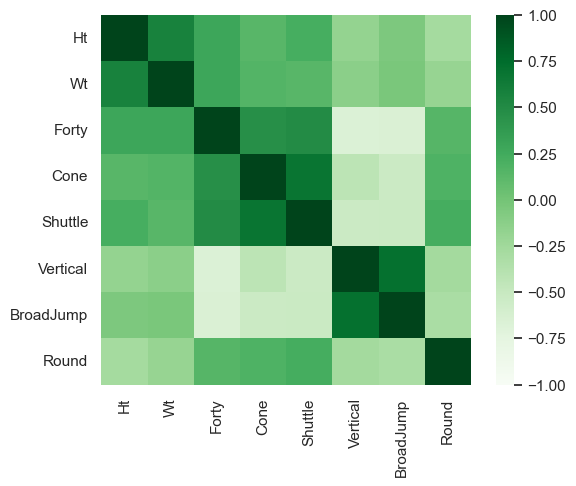

In [11]:
pd_corr = pre_draft_data.corr()
sns.set_theme(style = "dark")
sns.heatmap(pd_corr, vmin=-1.0, vmax=1.0, square=True, cmap="Greens")

 ## **Research Question 1) From the features available pre-draft - e.g. results obtained from the Scouting Combine - which are most informative in predicting the draft round in which a player is taken.**



Below we have created pairwise plots showing different combinations of the pre draft measurables plotted together, where each dot represents a different quarterback eligible for the draft between 2000 and 2015. When a trait is mapped onto itself, histograms are shown instead.  The colour of the plot shows the round in which each quarterback prospect was taken, from Round 1 (darkest green) to Round 8/Undrafted (lightest green). Any trait that shows good clustering and seperation between the different shades of green is likely to be useful for predicting quaterback draft positon. Unfortunately, there does not seem to be any clear trait combination that clearly predicts quarterback draft position. This isn't entirely unexpected, as there are lots of different ways of playing quarterback in the NFL, such as being a strong passer, or a quick scrambler, and the position and so there might not be any one trait that is the secret to being a high draft pick quarterback. Because of this, and because many of the pre draft measurables are correlated in the plot we made earlier, it may be instead be appropriate to conduct a Principal Component Analysis.

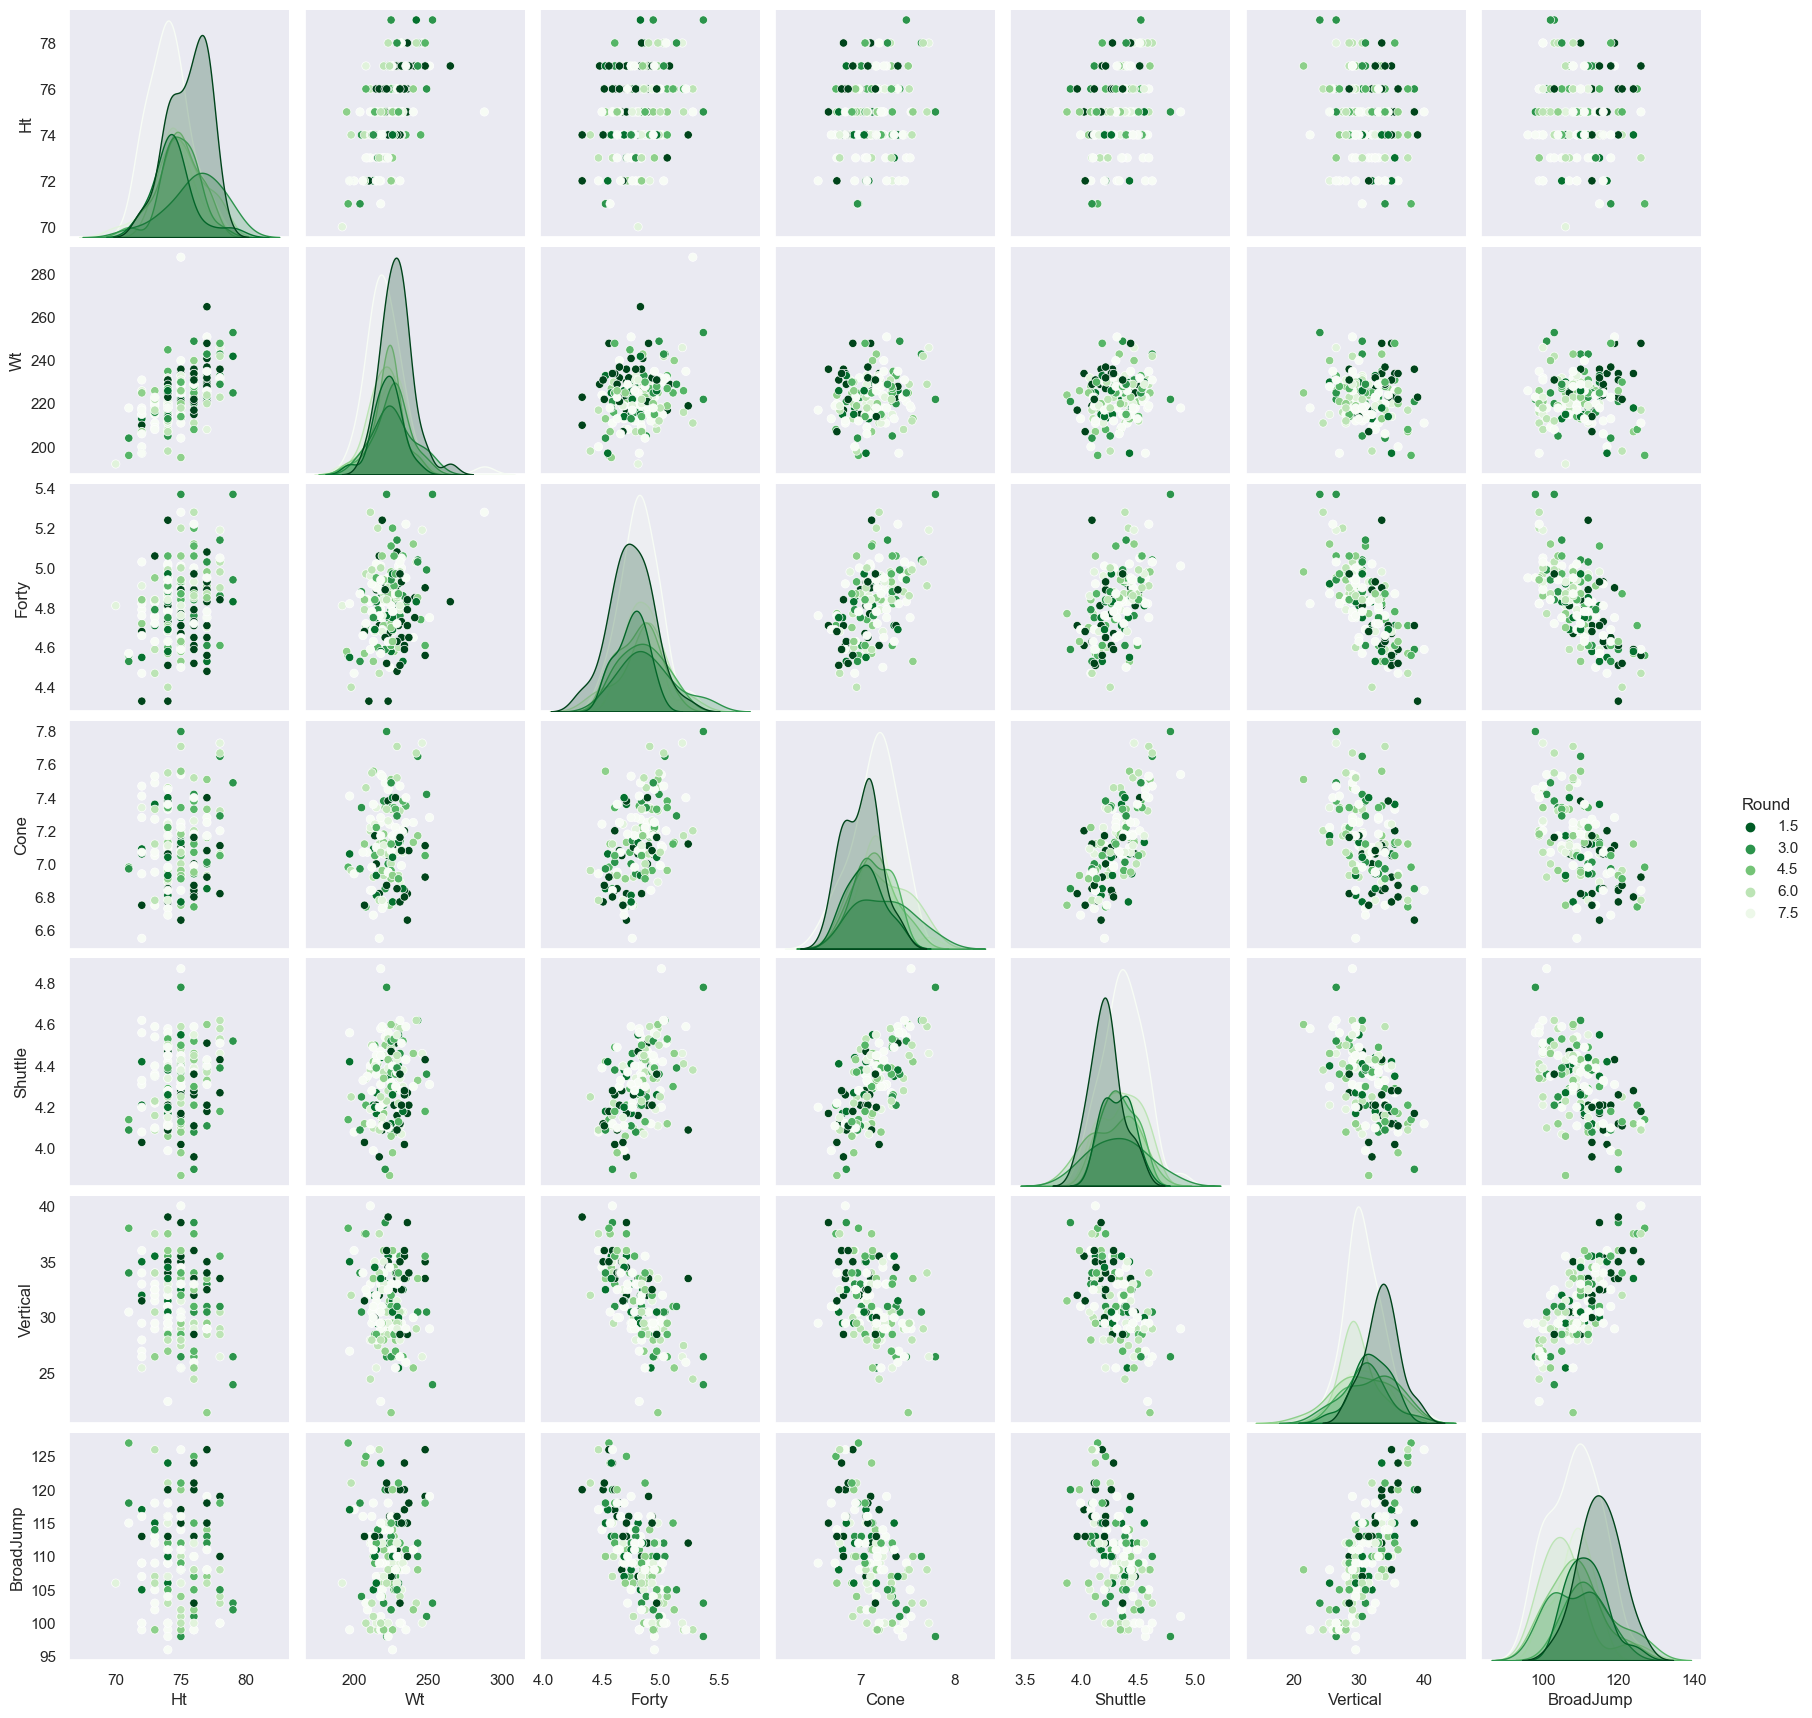

In [12]:
sns.set_theme(style = "dark")

sns.pairplot(qb_data.loc[:,pre_draft_measurables,], hue = "Round", palette = "Greens_r")


Create a new dataframe called combine_data which contains just the results from the NFL scouting combine. Make sure to remove NA values as the Principal Component Analysis won't work with them. Unfortunately this takes us down to 143 remaining quarterbacks, and so we also reset the index to renumber the rows in our dataframe. This is probably too few than we would like for a machine learning analysis, but the good news is that there is a draft every year, so with time we would be able to re-do this analysis with a larger sample size in time. 

In [13]:
pre_draft_measurables = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump","Round"]
pca_measurables = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump"]
combine_data = qb_data[pre_draft_measurables]
combine_data = combine_data.dropna()
combine_data = combine_data.reset_index(drop=True)
combine_data


,Ht,Wt,Forty,Cone,Shuttle,Vertical,BroadJump,Round
0,76,211,5.28,7.20,4.38,24.5,99.0,6.0
1,75,218,5.01,7.54,4.87,29.0,101.0,8.0
2,75,216,5.20,7.17,4.41,27.5,99.0,6.0
3,75,229,4.81,7.12,4.16,33.5,111.0,1.0
4,72,215,4.91,7.34,4.21,25.5,100.0,7.0
...,...,...,...,...,...,...,...,...
138,75,226,4.63,6.93,3.98,36.0,120.0,5.0
139,78,229,5.14,7.29,4.39,31.0,105.0,3.0
140,76,222,4.52,6.87,4.11,36.0,121.0,1.0
141,75,230,4.87,6.91,4.13,34.0,121.0,4.0


Many of the traits are on different scales. As there is a lot more variation in something like weight, which can vary in the magnitude of 10s, versus the forty time or cone times, where most quarterbacks are within a second of one another. To account for this we apply a standard scaling transformation to all of our variables that are feeding into the PCA.

In [14]:
pca_measurables = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump"]
x = combine_data.loc[:, pca_measurables].values
x = StandardScaler().fit_transform(x)
x

array([[ 0.68557123, -1.15892906,  2.55767425, ...,  0.4043727 ,
        -2.11651894, -1.66181472],
       [ 0.06508588, -0.50351212,  1.06166148, ...,  3.17953386,
        -0.72176222, -1.36364721],
       [ 0.06508588, -0.6907741 ,  2.11441121, ...,  0.57428053,
        -1.18668112, -1.66181472],
       ...,
       [ 0.68557123, -0.12898815, -1.65332465, ..., -1.12479773,
         1.44785934,  1.61802789],
       [ 0.06508588,  0.62005979,  0.28595116, ..., -1.01152584,
         0.82796747,  1.61802789],
       [ 0.68557123,  0.71369078,  0.84002996, ...,  0.29110082,
        -0.87673519, -1.0654797 ]])

Create a target variable called y, which is the response variable we are trying to predict. This is the round of the draft in which a player was drafted (measured from round 1 to 8 - remember that this actually reflects an undrafted player). We make sure that round is classed as an integer for our PCA analysis. 

In [15]:
y = combine_data["Round"]
y = pd.to_numeric(y, downcast ='integer')
y

0      6
1      8
2      6
3      1
4      7
      ..
138    5
139    3
140    1
141    4
142    1
Name: Round, Length: 143, dtype: int8

Load the seven principal components we are interested in calculating and complete the principal component analysis using our scaled dataframe, x.

In [16]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])
combine_data["Round"] = y
print(combine_data)

     Ht   Wt  Forty  Cone  Shuttle  Vertical  BroadJump  Round
0    76  211   5.28  7.20     4.38      24.5       99.0      6
1    75  218   5.01  7.54     4.87      29.0      101.0      8
2    75  216   5.20  7.17     4.41      27.5       99.0      6
3    75  229   4.81  7.12     4.16      33.5      111.0      1
4    72  215   4.91  7.34     4.21      25.5      100.0      7
..   ..  ...    ...   ...      ...       ...        ...    ...
138  75  226   4.63  6.93     3.98      36.0      120.0      5
139  78  229   5.14  7.29     4.39      31.0      105.0      3
140  76  222   4.52  6.87     4.11      36.0      121.0      1
141  75  230   4.87  6.91     4.13      34.0      121.0      4
142  76  231   4.97  7.16     4.36      28.5      103.0      1

[143 rows x 8 columns]


Examine the principal component scores for each quarterback in our list of 143. At the moment it is difficult to see what these mean and what they can tell us about each quarterback's traits.

In [17]:
finalDf = pd.concat([principalDf, combine_data['Round']] , axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Round
0,3.041217,1.141563,-1.889083,0.871564,0.814754,0.438473,0.338111,6
1,3.372830,1.114191,1.638275,0.848725,0.270468,-0.502938,-0.688281,8
2,2.414588,1.096817,-1.293262,0.240483,0.793034,0.042763,-0.298057,6
3,-0.642604,-0.594869,-0.136770,-0.715453,0.267477,0.298960,-0.059896,1
4,1.345806,2.392731,-0.909801,-1.095204,-0.764083,0.356959,0.686509,7
...,...,...,...,...,...,...,...,...
138,-2.825563,-0.991854,-0.123040,-0.477443,0.250207,0.411751,0.321840,5
139,2.105862,-1.324794,-0.397304,0.379482,1.221144,0.617333,-0.263578,3
140,-2.896081,-1.162812,0.318795,0.557259,-0.096348,0.430984,0.001088,1
141,-1.641509,-1.111539,-0.433839,-0.259202,0.827400,-0.625170,0.595431,4


Create a scree plot of the seven principal components, ranked in order of the variance that they explain in our dataset. We are interested in the principal components with the most predictive power, and so will focus on the first two, as after this there is a significant drop-off.

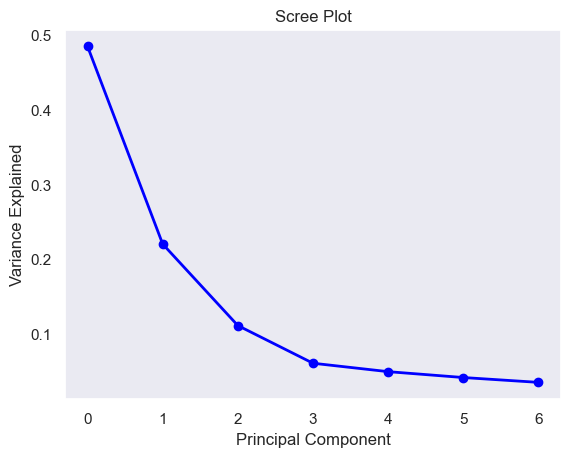

In [18]:
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth = 2, color = "blue")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

To obtain the actual numbers from the y-axis in the above plot we can use the code below. We can see that PC1 explains around 49% of the variance, and PC2 explains around 22%. This is about what we would expect. We have been successful in using PCA to collapse the dimensionality of our dataset from 7 variables to just 2, while still being able to explain around 70% of the variance.

In [19]:
pca.explained_variance_ratio_

array([0.4850141 , 0.21994131, 0.1106579 , 0.06011955, 0.04883578,
       0.04096601, 0.03446535])

We still don't know what each of the principal components actual mean and how they map onto our original features taken from the NFL scouting combine. To understand this, we need to work out the loadings, as shown below. This tells us how each of the principal components correlate with our original seven features. We can see that PC1 is mainly determined by high positive correlation with Forty, Cone and Shuttle (collective measures of speed or agility) and negative correlations with Vertical and Broad Jump (measures of explosiveness). In comparison PC2 is mainly determined by a negative correlation with height and weight. As such, it may be helpful to consider PC1 as a collective measure of athleticism (where high values map to having low speed and low explosiveness), and PC2 as a collective measure of size (where high values map to being shorter and lighter).

In [20]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'], index= combine_data[pca_measurables].columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Ht,0.191786,-0.666936,-0.076908,0.536125,0.084570,0.462780,-0.061265
Wt,0.165962,-0.681844,0.011613,-0.559240,-0.244430,-0.363724,-0.051180
Forty,0.443591,0.019779,-0.373832,-0.097592,0.766008,-0.228358,0.121020
Cone,0.408916,0.073874,0.607051,-0.317516,0.086647,0.442025,0.393839
Shuttle,0.423120,0.073349,0.515142,0.430499,-0.045231,-0.515704,-0.311277
Vertical,-0.440451,-0.143935,0.392759,-0.207184,0.541201,0.111083,-0.531849
BroadJump,-0.445714,-0.241535,0.257020,0.247439,0.209480,-0.357374,0.666421


To better understand the relationship between our two top principal components and the NFL draft round we can plot our 143 quarterbacks. Darker colours represent quarterbacks who were seen as better prospects and taken in the first round. We can see they tend to cluster more in the bottom left of our graph, so consist of low PC1 and low PC2 values. This maps onto high athleticism and high size, which would make sense with what we might predict as being desirable traits in a quarterback before completing this analysis.

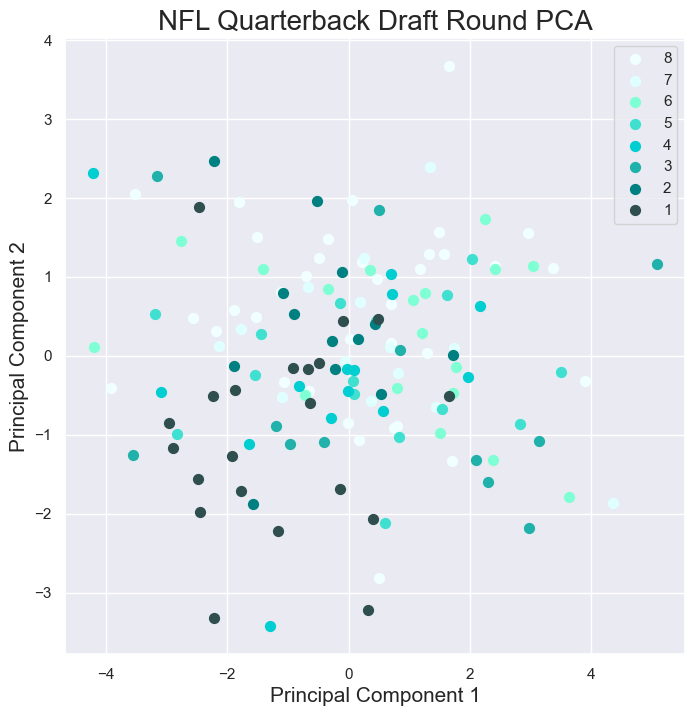

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('NFL Quarterback Draft Round PCA', fontsize = 20)
targets = [8,7,6,5,4,3,2,1]
colors = ['azure','lightcyan','aquamarine','turquoise','darkturquoise','lightseagreen','teal','darkslategrey']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Round'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We are now at the point where we can use our top two principal components from our analysis in a machine learning k-nearest neighbours analysis. We are going to try and use the values for these two components to best predict which round a quarterback will be drafted in. 

In [22]:
X = finalDf[["principal component 1", "principal component 2"]]
X

,principal component 1,principal component 2
0,3.041217,1.141563
1,3.372830,1.114191
2,2.414588,1.096817
3,-0.642604,-0.594869
4,1.345806,2.392731
...,...,...
138,-2.825563,-0.991854
139,2.105862,-1.324794
140,-2.896081,-1.162812
141,-1.641509,-1.111539


Parameters sets the range of neighbours that we want to consider for our k-nearest neighbour analysis. We considered the range from 1 - 50 neighbours. This is an example of hyperparameterisation, as we don't know which will yield the best accuracy for classification and so let the computer run them all and compare.

Split X (our dataset with two features of interest) into a training and test dataset (approximately 80/20 split), we will use machine learning to train our classification system and then test it on the remaining dataset.

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
model = KNeighborsClassifier()
parameters = {
    "n_neighbors" : range(1, 60),
}
clf = GridSearchCV(model, parameters).fit(train_X, train_y)

Create a dataframe of the results from our k-nearest neighbour analyses. Sort by their test scores (how accurately they predicted the draft round for our test data set), and allow us to see what value of k (how many neighbours) was best for the analysis.

In [24]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
51,52,0.308658,0.049389,1
46,47,0.299134,0.063126,2
52,53,0.299134,0.037749,3
50,51,0.298701,0.034059,4
54,55,0.290043,0.070405,5


Visualise the above, showing the mean test score and standard deviation for each value of K. We can see this matches the same results from our table above.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

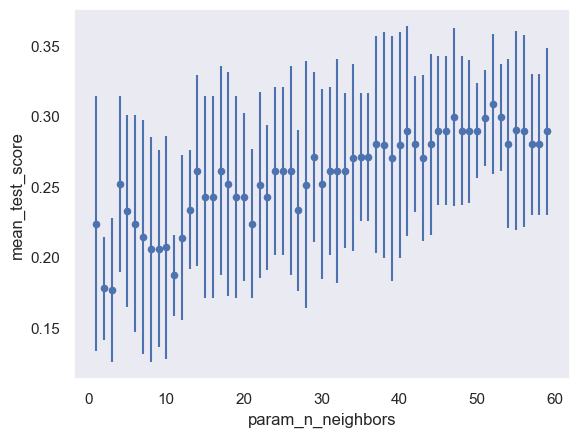

In [25]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

Use the plot_knn function as provided in our teaching to plot the results of the k-nearest neighbour analysis with the optimised number of neighbours. This plot shows our collected data in circles and the background colour shows the classification that would be assigned to any hypothetical new data that was collected at those values.

The clf score is a measure of how effective the k-nearest neighbour analysis based on these two features is at classifying when a quarterback prospect will be drafted. A higher score closer to 1 is best.

0.2777777777777778

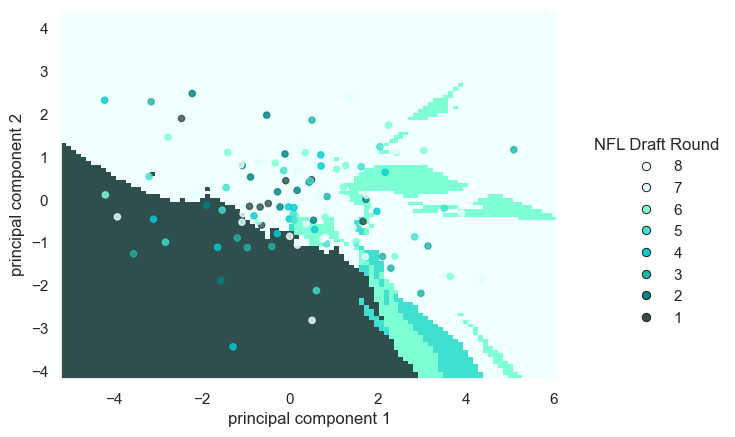

In [26]:
def plot_knn(model, X, y, resolution=100, ax=None):
    
    from matplotlib.lines import Line2D
    from matplotlib.ticker import MaxNLocator
    import matplotlib as mpl
  
    colormap = np.array(['white','darkslategrey', 'teal','lightseagreen','darkturquoise','turquoise','aquamarine','lightcyan','azure'])


    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap=mpl.colors.LinearSegmentedColormap.from_list("",['darkslategrey', 'teal','lightseagreen','darkturquoise','turquoise','aquamarine','lightcyan','azure']), alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c= colormap[y], colorbar=False, alpha=0.8, ax=ax)
    legend_class = []
    for Round, color in zip([8,7,6,5,4,3,2,1], ['azure','lightcyan','aquamarine','turquoise','darkturquoise','lightseagreen','teal','darkslategrey']):
        legend_class.append(Line2D([0], [0], marker='o', label=Round,ls='None',
                               markerfacecolor=color, 
                               markeredgecolor='k', markeredgewidth=0.7))
    ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.2, 0.4),
                    frameon=False, title='NFL Draft Round')
plot_knn(clf, X, y)
clf.score(test_X, test_y)

 ## **Research Question 2) From the features available pre-draft - e.g. results obtained from the Scouting Combine - which are most informative in predicting the success that a QB will have in the NFL.**

Start by creating a new data frame that contains all of the pre draft features, alongside new metrics of on-field success, such as All Pro nominations, Pro Bowl nominations, Years as a first team starter and total games played. Replace and remove any rows that contain NAs, and then re-index the data frame. 

In [27]:
career_features = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump","All_Pro","Pro_Bowl","First_Team","G"]
career_data = qb_data[career_features]
career_data[["All_Pro"]] = career_data[["All_Pro"]].fillna(0)
career_data[["Pro_Bowl"]] = career_data[["Pro_Bowl"]].fillna(0)
career_data[["First_Team"]] = career_data[["First_Team"]].fillna(0)
career_data[["G"]] = career_data[["G"]].fillna(0)
career_data = career_data.dropna()
career_data = career_data.reset_index(drop=True)
career_data


,Ht,Wt,Forty,Cone,Shuttle,Vertical,BroadJump,All_Pro,Pro_Bowl,First_Team,G
0,76,211,5.28,7.20,4.38,24.5,99.0,2.0,11.0,14.0,231.0
1,75,218,5.01,7.54,4.87,29.0,101.0,0.0,0.0,0.0,0.0
2,75,216,5.20,7.17,4.41,27.5,99.0,0.0,0.0,0.0,1.0
3,75,229,4.81,7.12,4.16,33.5,111.0,0.0,0.0,6.0,89.0
4,72,215,4.91,7.34,4.21,25.5,100.0,0.0,0.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
138,75,226,4.63,6.93,3.98,36.0,120.0,0.0,0.0,0.0,2.0
139,78,229,5.14,7.29,4.39,31.0,105.0,0.0,0.0,0.0,1.0
140,76,222,4.52,6.87,4.11,36.0,121.0,0.0,0.0,2.0,23.0
141,75,230,4.87,6.91,4.13,34.0,121.0,0.0,0.0,0.0,2.0


Visual exploration of the data. We can see lots of correlations among the measures of career success. All Pro and Pro Bowl nominations are very strongly correlated, as these are both measures of success for the very best players in the league. Years as a first team starter and games played are similarly correlated as they are measures of good, NFL quality players.

<AxesSubplot:>

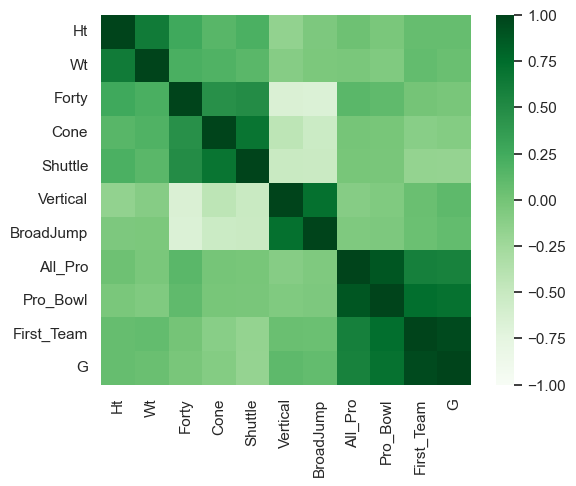

In [28]:
cd_corr = career_data.corr()
sns.heatmap(cd_corr, vmin=-1.0, vmax=1.0, square=True, cmap="Greens")

For the Pro Bowl and First Team categories we have a wide range of career successes, ranging from 0 to 15 times in some cases. To simply this, and limit the number of categories that our nearest neighbour analysis will be trying to group into, we relabel anything above 6 as a 7. 

In [29]:
career_data.loc[career_data['Pro_Bowl'] > 6, 'Pro_Bowl'] = 7 
career_data.loc[career_data['First_Team'] > 6, 'First_Team'] = 7
career_data

,Ht,Wt,Forty,Cone,Shuttle,Vertical,BroadJump,All_Pro,Pro_Bowl,First_Team,G
0,76,211,5.28,7.20,4.38,24.5,99.0,2.0,7.0,7.0,231.0
1,75,218,5.01,7.54,4.87,29.0,101.0,0.0,0.0,0.0,0.0
2,75,216,5.20,7.17,4.41,27.5,99.0,0.0,0.0,0.0,1.0
3,75,229,4.81,7.12,4.16,33.5,111.0,0.0,0.0,6.0,89.0
4,72,215,4.91,7.34,4.21,25.5,100.0,0.0,0.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
138,75,226,4.63,6.93,3.98,36.0,120.0,0.0,0.0,0.0,2.0
139,78,229,5.14,7.29,4.39,31.0,105.0,0.0,0.0,0.0,1.0
140,76,222,4.52,6.87,4.11,36.0,121.0,0.0,0.0,2.0,23.0
141,75,230,4.87,6.91,4.13,34.0,121.0,0.0,0.0,0.0,2.0


Below we have created pairwise plots showing different combinations of the pre draft measurables plotted together, where each dot represents a different quarterback eligible for the draft between 2000 and 2015. When a trait is mapped onto itself, histograms are shown instead.  The colour of the plot shows the number of All Pro nominations for each quarterback in their career from 2 (darkest green) to 0 (lightest green). Unsuprisingly, there are very few All Pro quarterbacks, as this award is only given to the very best, and so this award does not make a good response variable as it is so rare.

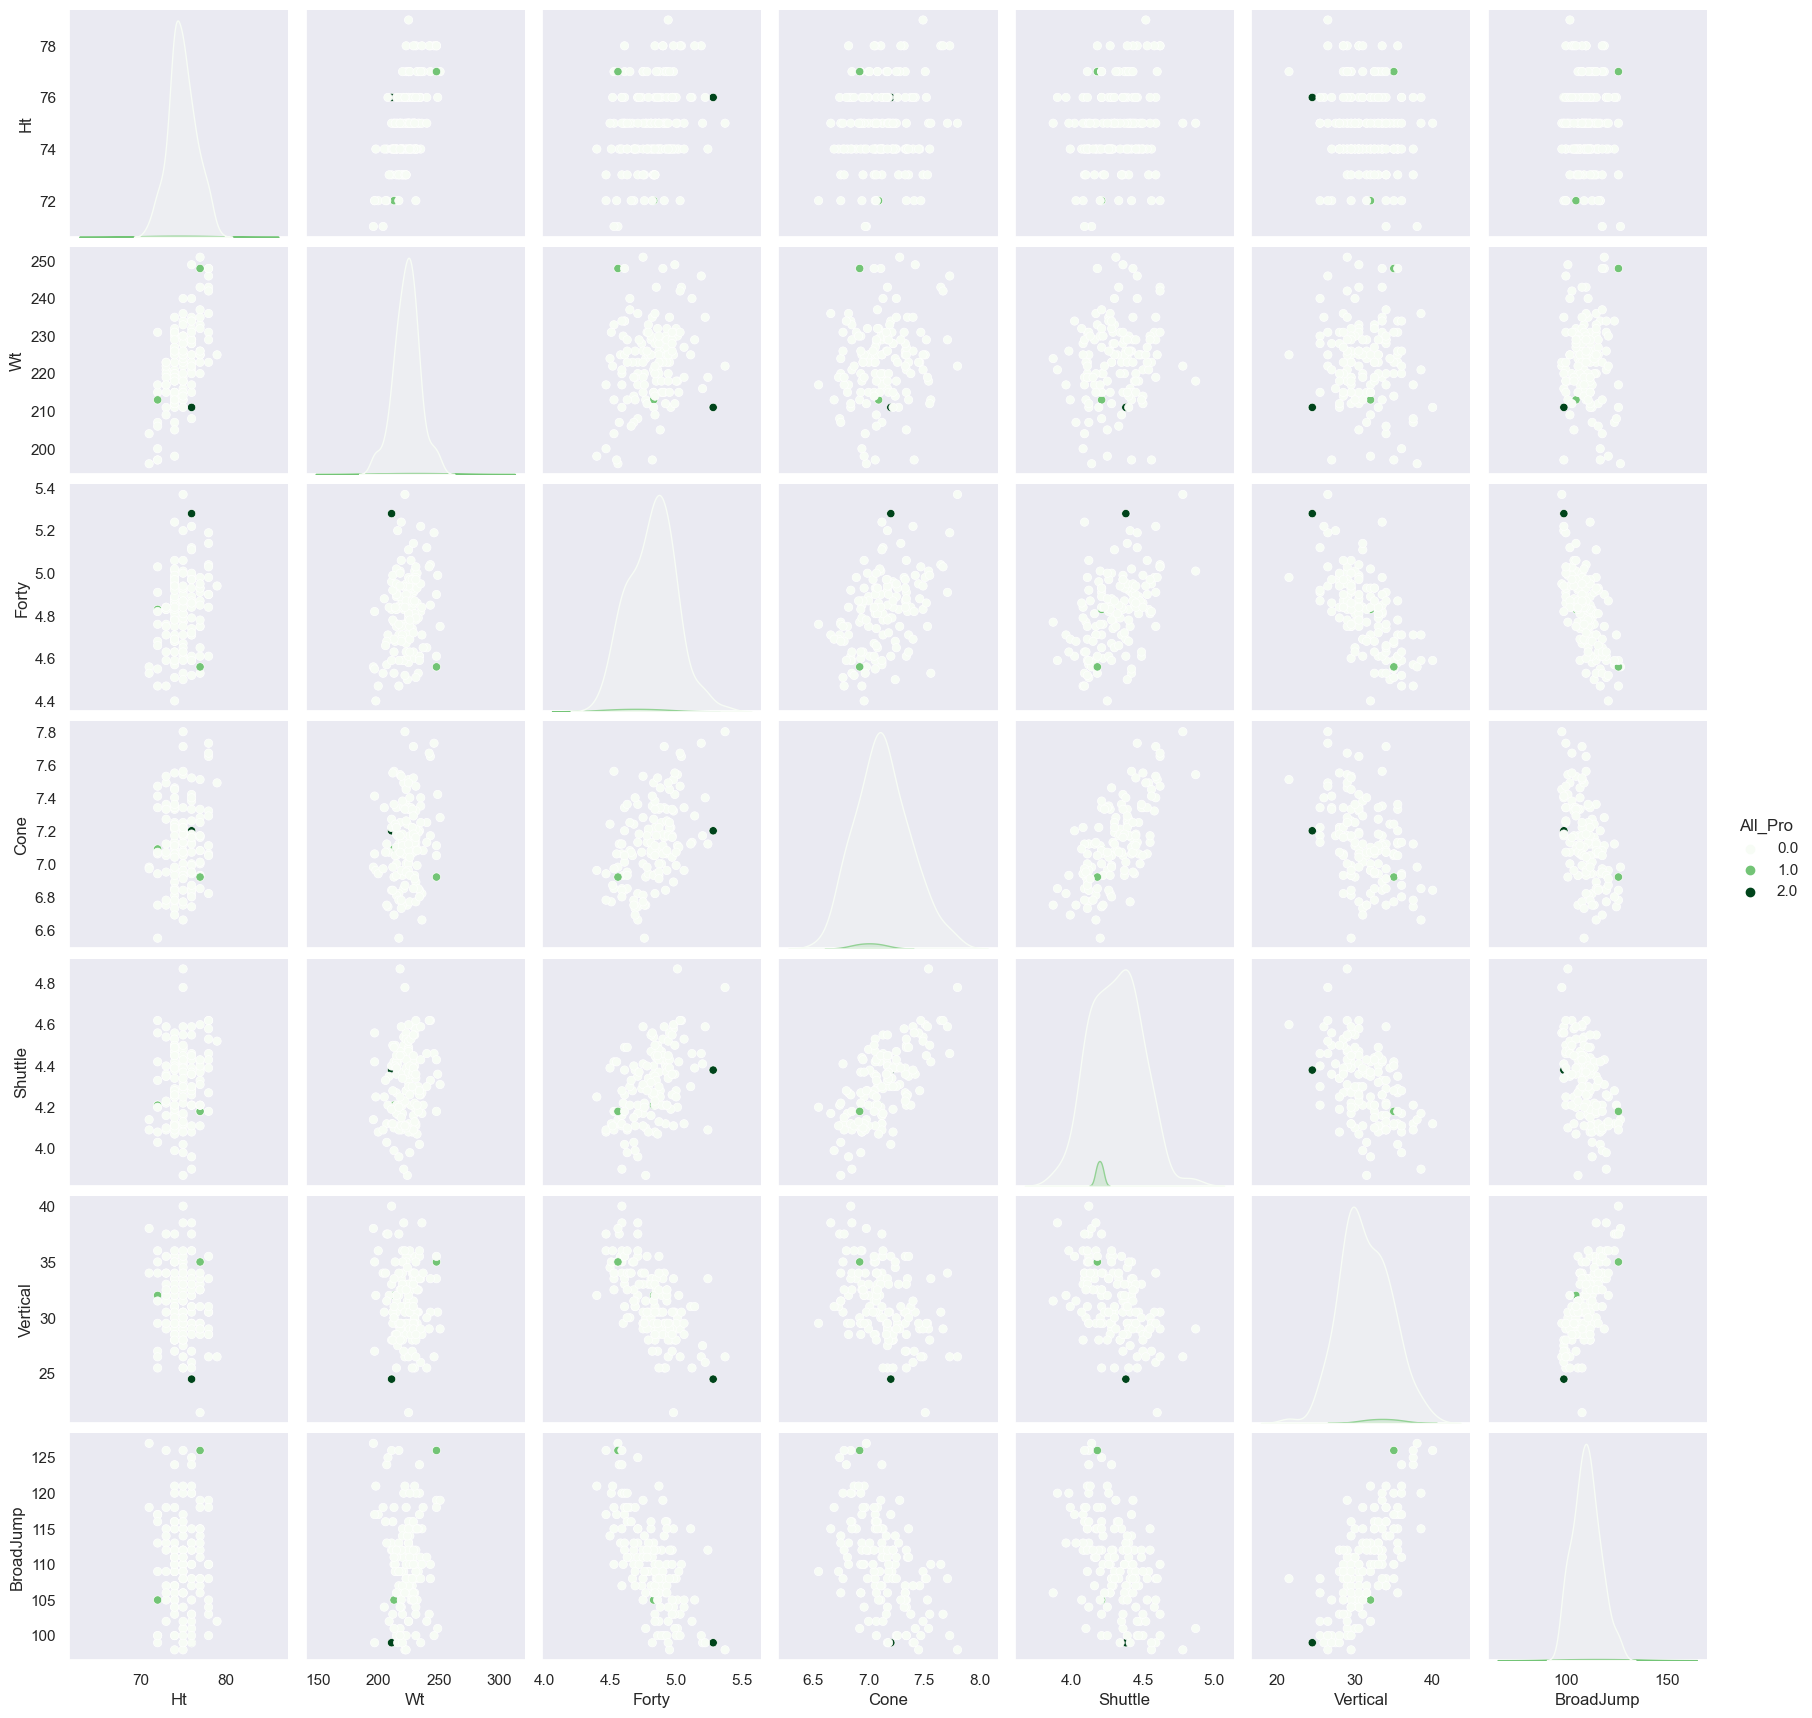

In [30]:
All_Pro_measurables = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump","All_Pro"]
sns.set_theme(style = "dark")
sns.pairplot(career_data.loc[:,All_Pro_measurables,], hue = "All_Pro", palette = "Greens")

Below we have created pairwise plots showing different combinations of the pre draft measurables plotted together, where each dot represents a different quarterback eligible for the draft between 2000 and 2015. When a trait is mapped onto itself, histograms are shown instead. The colour of the plot shows the number of Pro Bowl nominations for each quarterback in their career from 8+ (darkest green) to 0 (lightest green). As above, there are still very few All Pro quarterbacks, so we will need to look for a better response variable.

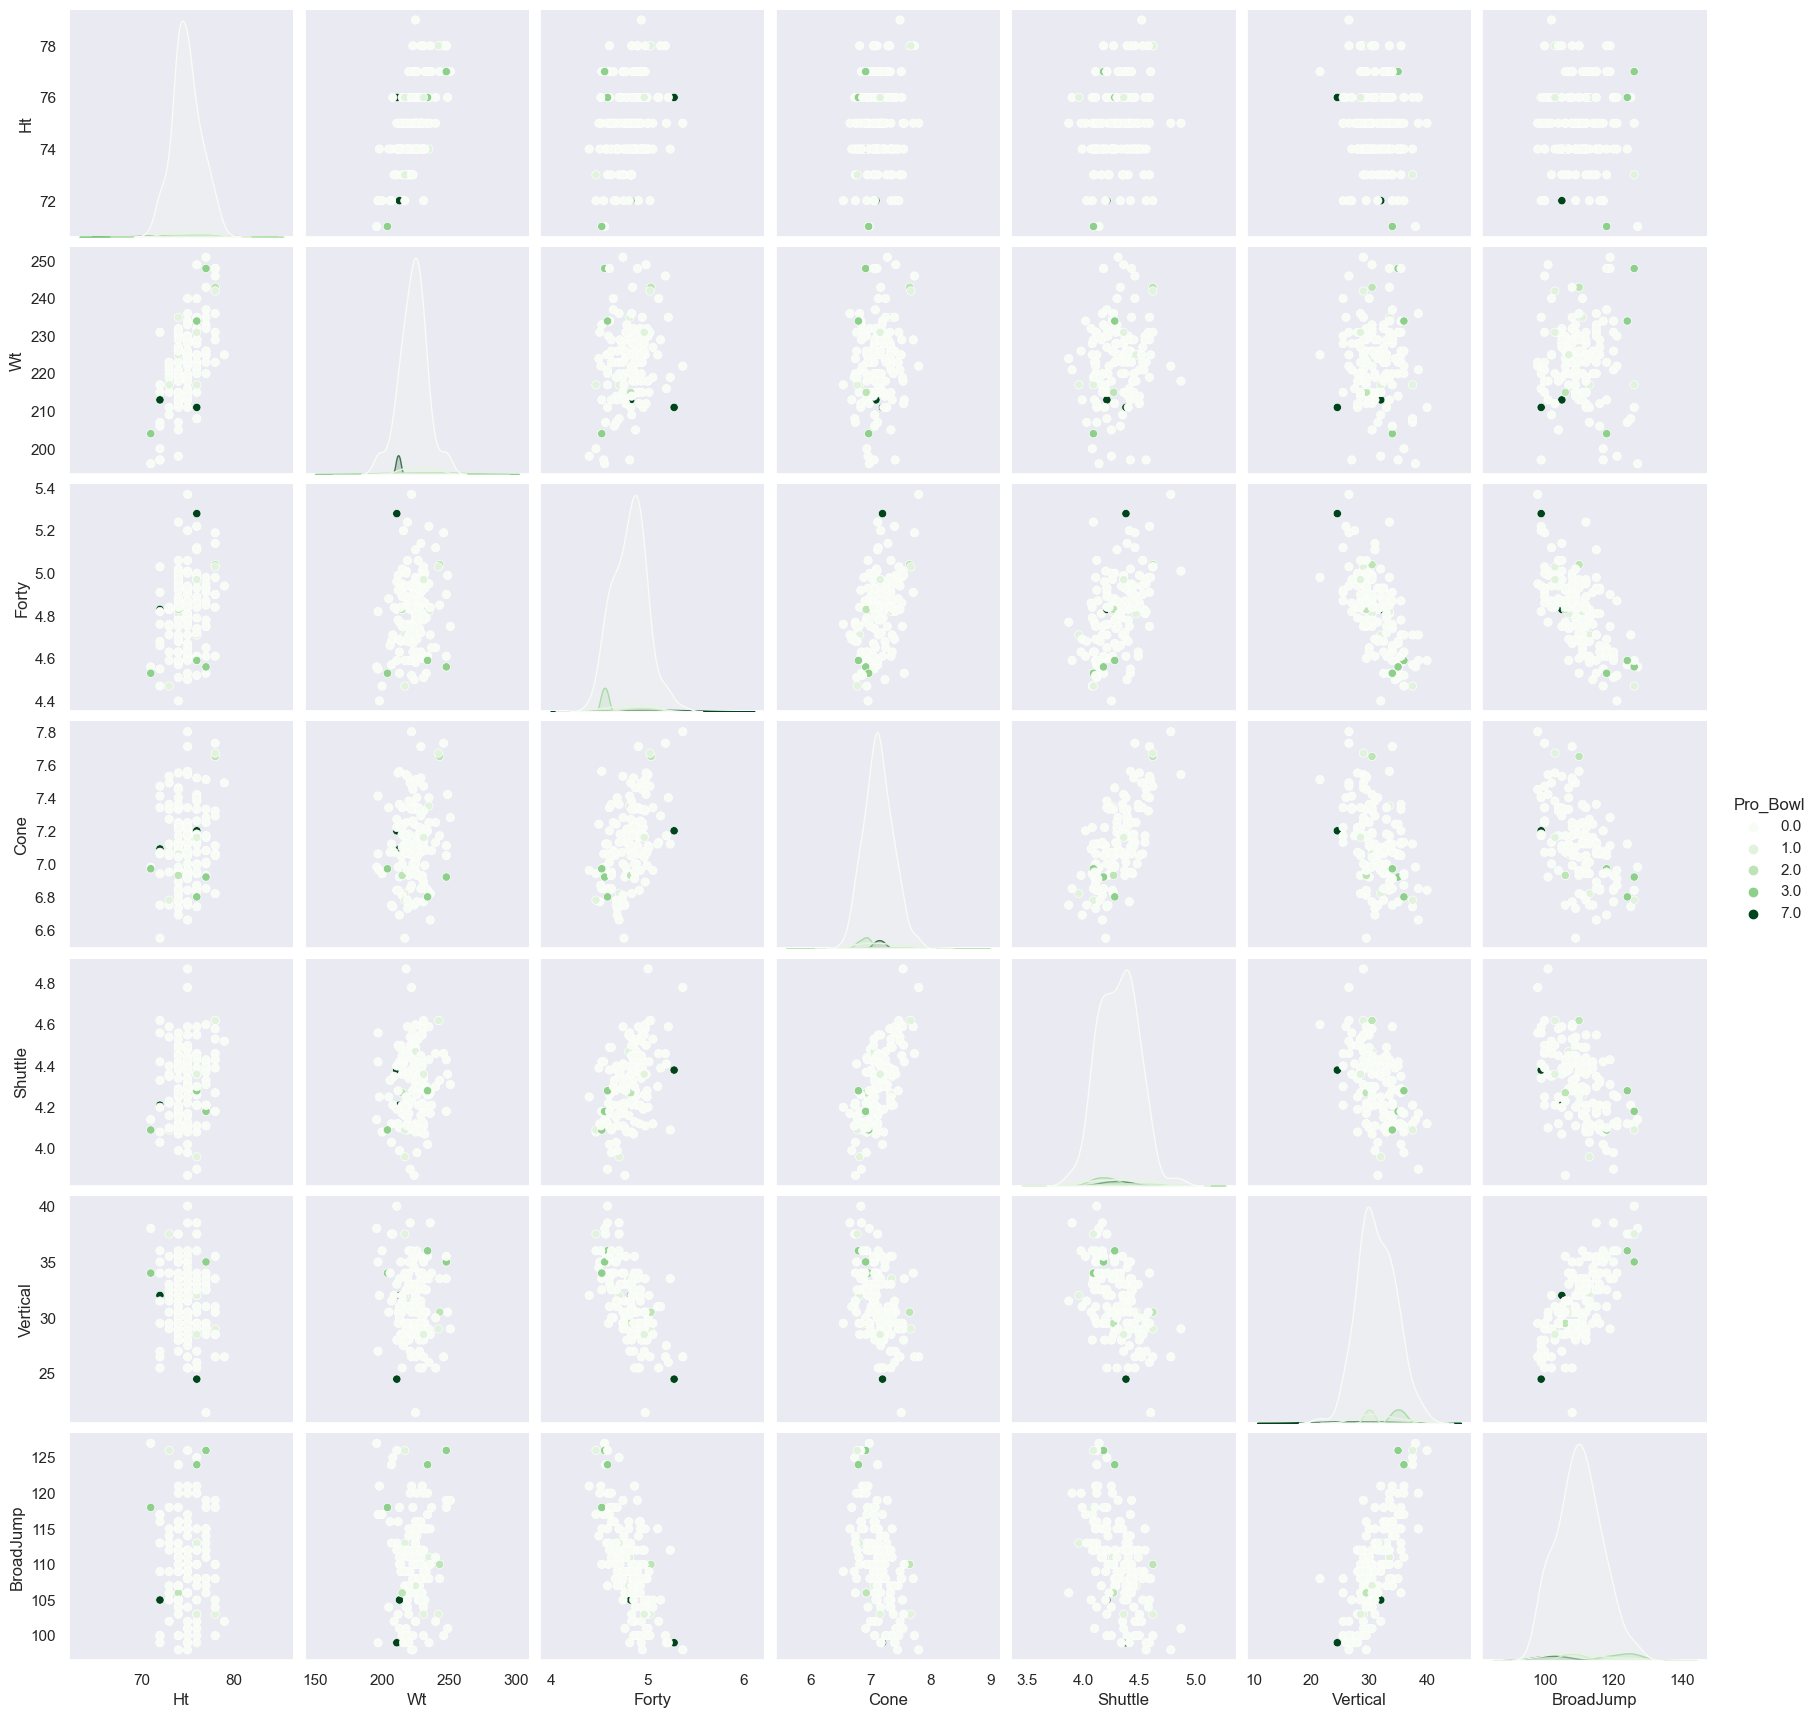

In [31]:
Pro_Bowl_measurables = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump","Pro_Bowl"]
sns.set_theme(style = "dark")
sns.pairplot(career_data.loc[:,Pro_Bowl_measurables,], hue = "Pro_Bowl", palette = "Greens")

Below we have created pairwise plots showing different combinations of the pre draft measurables plotted together, where each dot represents a different quarterback eligible for the draft between 2000 and 2015. When a trait is mapped onto itself, histograms are shown instead. The colour of the plot shows the number of years spent as a first team starter for each quarterback in their career from 8+ (darkest green) to 0 (lightest green). Here, we have some variation in the different categories, and so we can use it as a response variable for analysis as we did above. As before, because of the co-linearity of the combine traits, we will use a PCA analysis, using the same top two principal components as calculated above.

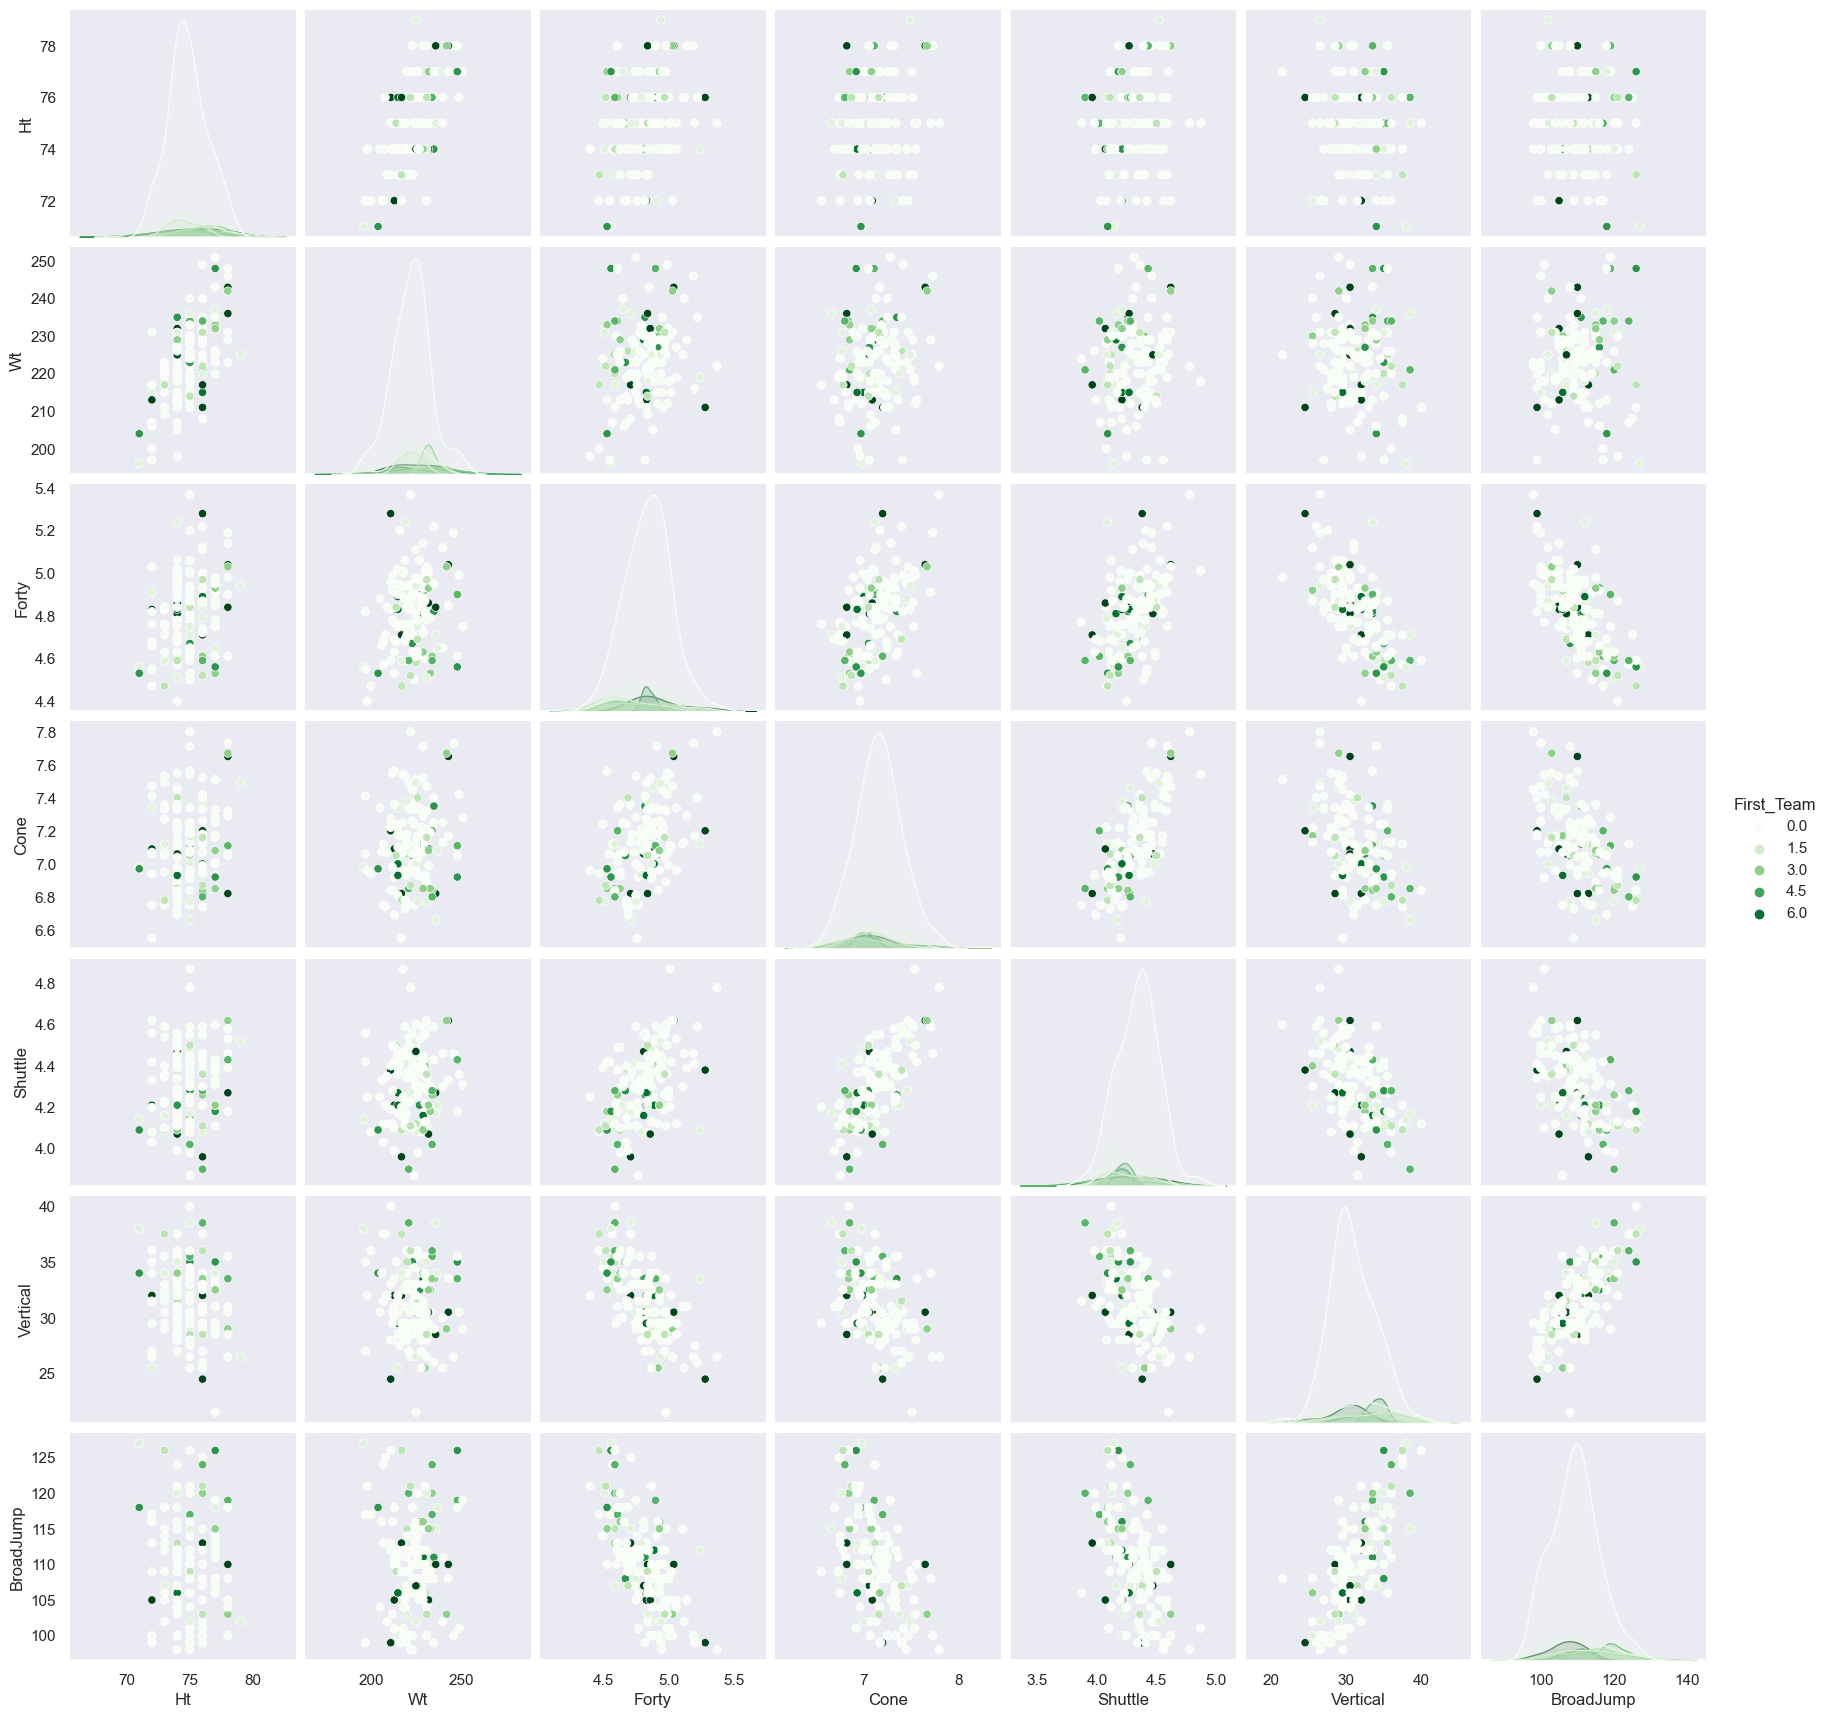

In [32]:
First_Team_measurables = ["Ht","Wt","Forty","Cone","Shuttle","Vertical","BroadJump","First_Team"]
sns.set_theme(style = "dark")
sns.pairplot(career_data.loc[:,First_Team_measurables,], hue = "First_Team", palette = "Greens")

Create a target variable called y, which is the response variable we are trying to predict. This is the number of years that quarterback will spend as a first team starter (measured from 0 to 7 - remember that this actually reflects 7+ years in the league). We make sure that round is classed as an integer for our PCA analysis. 

In [33]:
y = career_data["First_Team"]
y = pd.to_numeric(y, downcast ='integer')
y

0      7
1      0
2      0
3      6
4      1
      ..
138    0
139    0
140    2
141    0
142    2
Name: First_Team, Length: 143, dtype: int8

Examine the principal component scores for each quarterback in our list of 143. The loadings for these principal components will be the same as before, so PC1 is a measure of athletic ability, and PC2 is a measure of size.

In [34]:
finalDf = pd.concat([principalDf, career_data['First_Team']] , axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,First_Team
0,3.041217,1.141563,-1.889083,0.871564,0.814754,0.438473,0.338111,7.0
1,3.372830,1.114191,1.638275,0.848725,0.270468,-0.502938,-0.688281,0.0
2,2.414588,1.096817,-1.293262,0.240483,0.793034,0.042763,-0.298057,0.0
3,-0.642604,-0.594869,-0.136770,-0.715453,0.267477,0.298960,-0.059896,6.0
4,1.345806,2.392731,-0.909801,-1.095204,-0.764083,0.356959,0.686509,1.0
...,...,...,...,...,...,...,...,...
138,-2.825563,-0.991854,-0.123040,-0.477443,0.250207,0.411751,0.321840,0.0
139,2.105862,-1.324794,-0.397304,0.379482,1.221144,0.617333,-0.263578,0.0
140,-2.896081,-1.162812,0.318795,0.557259,-0.096348,0.430984,0.001088,2.0
141,-1.641509,-1.111539,-0.433839,-0.259202,0.827400,-0.625170,0.595431,0.0


To better understand the relationship between our two top principal components and the number of years spent as a first team starter we can plot our 143 quarterbacks. Darker colours represent quarterbacks who were better players and started for their team for longer. We can see a slight trend in that multi-year starters tend cluster more in the bottom left of our graph, so consist of low PC1 and low PC2 values. However, the very best players who start for 7+ years tend to be scattered throughout our sample. Perhaps these superstar players have hidden traits not included in our model, such as their winning personalities, that mean they don't follow the same trends.

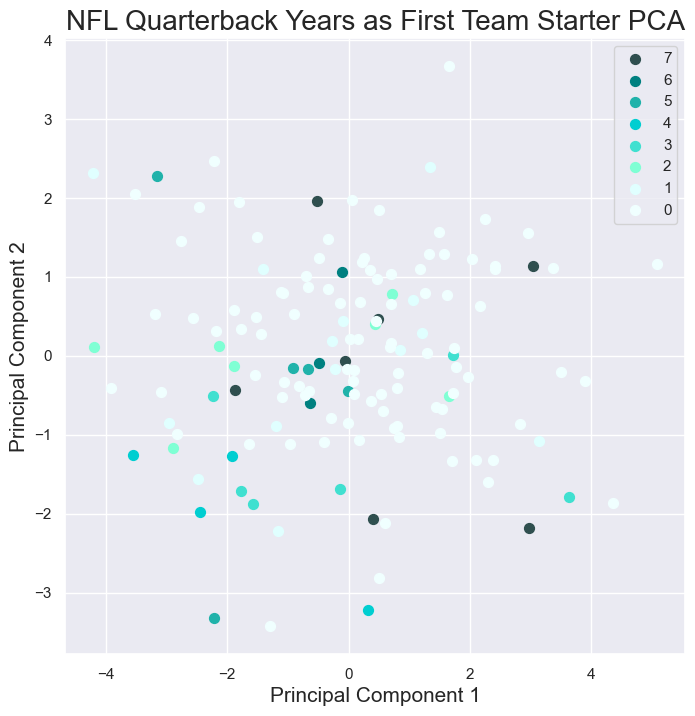

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('NFL Quarterback Years as First Team Starter PCA', fontsize = 20)
targets = [7,6,5,4,3,2,1,0]
colors = ['darkslategrey','teal','lightseagreen','darkturquoise','turquoise','aquamarine','lightcyan','azure']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['First_Team'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We are now at the point where we can use our top two principal components from our analysis in a machine learning k-nearest neighbours analysis. We are going to try and use the values for these two components to best predict how long a quarterback will stay in the league as a first team starter.

In [36]:
X = finalDf[["principal component 1", "principal component 2"]]
X

,principal component 1,principal component 2
0,3.041217,1.141563
1,3.372830,1.114191
2,2.414588,1.096817
3,-0.642604,-0.594869
4,1.345806,2.392731
...,...,...
138,-2.825563,-0.991854
139,2.105862,-1.324794
140,-2.896081,-1.162812
141,-1.641509,-1.111539


Parameters sets the range of neighbours that we want to consider for our k-nearest neighbour analysis. We considered the range from 1 - 50 neighbours. This is an example of hyperparameterisation, as we don't know which will yield the best accuracy for classification and so let the computer run them all and compare.

Split X (our dataset with two features of interest) into a training and test dataset (approximately 80/20 split), we will use machine learning to train our classification system and then test it on the remaining dataset.

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
model = KNeighborsClassifier()
parameters = {
    "n_neighbors" : range(1, 51),
}
clf = GridSearchCV(model, parameters).fit(train_X, train_y)

Create a dataframe of the results from our k-nearest neighbour analyses. Sort by their test scores (how accurately they predicted the draft round for our test data set), and allow us to see what value of k (how many neighbours) was best for the analysis.

In [38]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
4,5,0.683117,0.048624,1
5,6,0.683117,0.048624,1
6,7,0.682684,0.029666,3
7,8,0.682684,0.029666,3
8,9,0.682684,0.029666,3


Visualise the above, showing the mean test score and standard deviation for each value of K. We can see this matches the same results from our table above.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

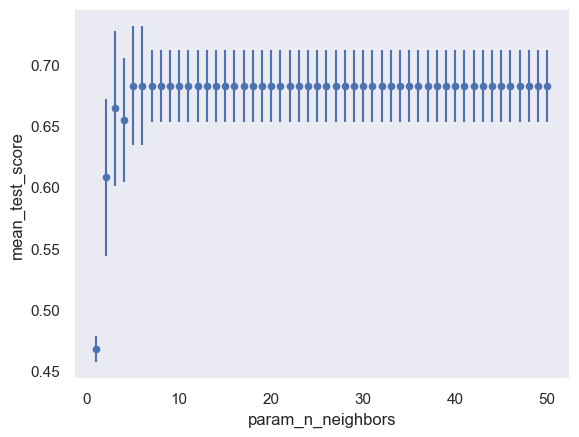

In [39]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

Use the plot_knn function as provided in our teaching to plot the results of the k-nearest neighbour analysis with the optimised number of neighbours. This plot shows our collected data in circles and the background colour shows the classification that would be assigned to any hypothetical new data that was collected at those values.

The clf score is a measure of how effective the k-nearest neighbour analysis based on these two features is at classifying how long a QB will play as a first team starter for. A higher score closer to 1 is best.

In [40]:
y

0      7
1      0
2      0
3      6
4      1
      ..
138    0
139    0
140    2
141    0
142    2
Name: First_Team, Length: 143, dtype: int8

0.6388888888888888

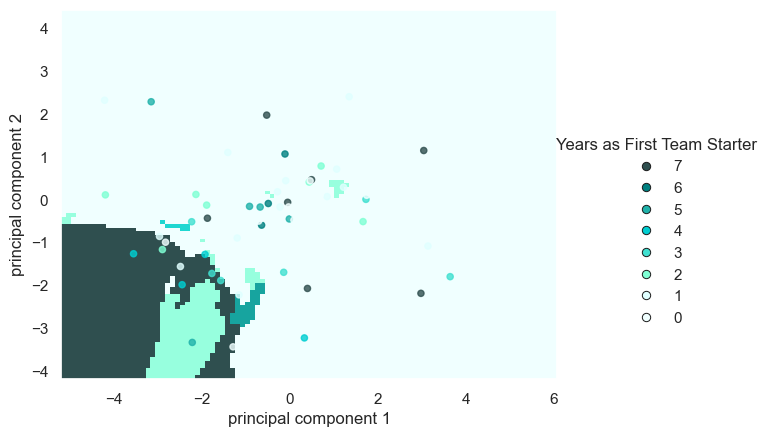

In [41]:
def plot_knn(model, X, y, resolution=100, ax=None):
    
    from matplotlib.lines import Line2D
    from matplotlib.ticker import MaxNLocator
    import matplotlib as mpl
  
    colormap = np.array(['azure','lightcyan','aquamarine','turquoise','darkturquoise','lightseagreen','teal','darkslategrey'])


    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap=mpl.colors.LinearSegmentedColormap.from_list("",['azure','lightcyan','aquamarine','turquoise','darkturquoise','lightseagreen','teal','darkslategrey']), alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=colormap[y], colorbar=False, alpha=0.8, ax=ax)
    legend_class = []
    for Years, color in zip([7,6,5,4,3,2,1,0], ['darkslategrey','teal','lightseagreen','darkturquoise','turquoise','aquamarine','lightcyan','azure']):
        legend_class.append(Line2D([0], [0], marker='o', label=Years,ls='None',
                               markerfacecolor=color, 
                               markeredgecolor='k', markeredgewidth=0.7))
    ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.2, 0.4),
                    frameon=False, title='Years as First Team Starter')
plot_knn(clf, X, y)
clf.score(test_X, test_y)

 # Conclusions
 
The results from the analysis presented above show that it is difficult to predict what round of the NFL Draft a quarterback will be drafted in, when based on NFL Scouting Combine data alone. Even when compressing the high dimensionality of the scouting data into two principal components, our machine learning model has an accuracy score of only 0.28 (out of a maximum of 1). One possible trend that emerges when exploring the principal components visually is that high round quarterbacks, i.e. the most favoured prospects, tend to cluster together with low principal component 1 scores and low principal component 2 scores. When combined with the loadings of the traits that map onto these components, it suggests that high athleticism (quicker Cone, Forty and Shuttle times combined with higher Vertical and Broad Jump performance) and large size (measured by height and weight) lead to higher draft positioning. This makes intuitive sense in what we understand about the quarterback position whereby athleticism to throw powerful deep balls or make quick running plays, and height to stand tall in the pocket, are all important characteristics.

When applying our machine learning model to try and predict the longevity that each quarterback prospect will have as a first team starter in the NFL, we get slightly better performance. In this context, our K-nearest neighbour model receives an accuracy score of 0.68 (also measured out of a maximum score of 1). This is likely driven by the fact that most quarterback prospects do not have a successful career in the NFL, as there are only 32 NFL starting QB vacancies in any one year, and many more prospects than this. Examining the plot, we can see that for most of the parameter space of principal component 1 and principal component 2, our model predicts 0 years as a starter. The exception, is once again, in the bottom left where the most athletic and tallest prospects are predicted to make it in the NFL. The similarity between the predictions from this model and the model for predicting the NFL draft round suggests that teams do draft efficiently and prioritise the right traits in prospects that are likely to transfer to on-field success.

Overall, this has been a useful exercise in demonstrating the application of machine learning and data science methods to the sport of American football. Ultimately, playing quarterback in the NFL requires a combination of skills, including being a good team-mate, excellent decision-making, leadership and many other intangibles that are not included in our models. As such, based on the data we have, it remains difficult to predict which quarterback prospects will be most successful. Data analysis has a role to play and can still be informative, but should be combined with traditional techniques of evaluating players, such as watching games and conducting interviews. What complicates matters further, is that the archetype of a successful quarterback position can vary from team to team depending on the offense that they run. Some teams will favour an explosive rushing attack that may require the quarterback to be mobile and strong, whereas others favour a patient passing offense that favours different skill sets. There remains no "one size fits all" solution of athletic traits that determines a successful quarterback.
